# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review amy of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

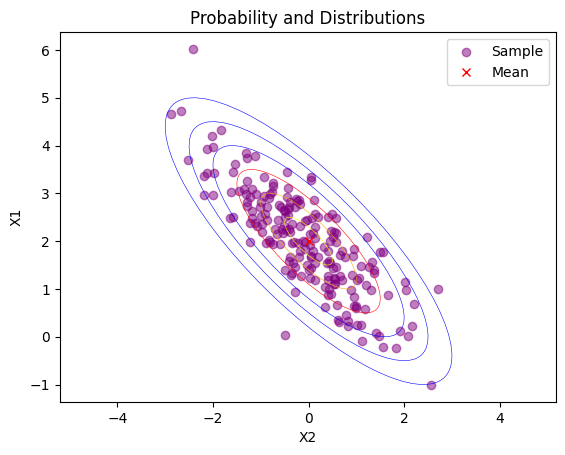

In [71]:
# Problem 1A & 1B
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

# Mean & Covariance
mean = [0, 2]
cov = [[1, -0.8],
       [-0.8, 1]]


# Ellipse function
def add_ellipse(mean, cov, ax, n_std=1.0, **kwargs):

    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    width, height = 2 * n_std * np.sqrt(vals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)

    ax.add_patch(ellipse)
    return ellipse

# Generating random 200 samples
num_samples = 200
samples = multivariate_normal(mean, cov).rvs(size=num_samples)

# Plotting
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color="purple", label="Sample" )

ax.plot(mean[0], mean[1], 'rx', label='Mean')
ax.legend()

# Add ellipses (1 standard deviation and 2 standard deviations)
add_ellipse(mean, cov, ax, n_std=0.5, edgecolor='yellow', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=1, edgecolor='orange', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=1.5, edgecolor='red', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=2, edgecolor='blue', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=2.5, edgecolor='blue', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=3, edgecolor='blue', facecolor='none', linewidth=0.4)


ax.set_title('Probability and Distributions')
ax.set_xlabel('X2')
ax.set_ylabel('X1')

# Set the x1 axis range from -2 to 2
ax.set_xlim(-2, 2)

# Equal Ratio so all plots are in the chart
ax.axis('equal')

# Display the plot
plt.show()


## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vector onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

### Problem 2C (10 points)

Plot the projected vector and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



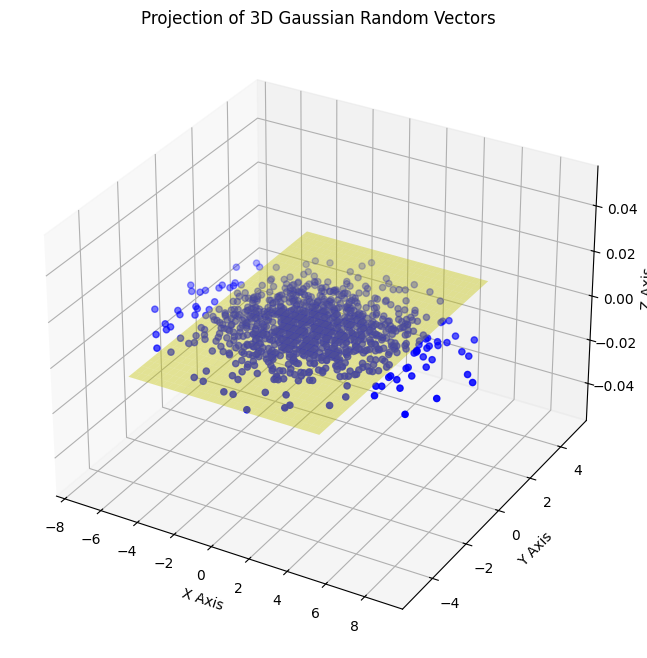

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cov_matrix = np.array([[4, 2, 1],
                       [2, 3, 1.5],
                       [1, 1.5, 2]])

mean_vector = np.zeros(3)

random_vectors = np.random.multivariate_normal(mean_vector, cov_matrix, 1000)

U, S, Vt = np.linalg.svd(cov_matrix)

principal_components = Vt[:2, :]

projected_vectors = np.dot(random_vectors, principal_components.T)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(-5, 5, 30), np.linspace(-5, 5, 30))
z = np.zeros(xx.shape)

ax.plot_surface(xx, yy, z, color="yellow", alpha=0.4)

ax.scatter(projected_vectors[:, 0], projected_vectors[:, 1], zs=0, zdir='z', s=20, color='blue', depthshade=True)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Projection of 3D Gaussian Random Vectors')

plt.show()

# Problem 2A:
# Answer: The principal components in a dataset are determined by the eigenvectors of the covariance matrix of that dataset.
# Problem 2B:
# Answer: Determined by the direction of the eigenvectors and how they relate to the original variables.
# Problem 2C: 
# Answer: Based on the direction and distribution data points relative to the axes defined by the principal components

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [37]:
# Insert your answer here and fee free to add markdown cells as needed

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement from scratch for the linear regression problem some enhancements that  can improve the convergence of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and comparatively to the baseline SGD algorithm. You can include all plots in the same figure.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed